In [1]:
import pandas as pd
import csv
import numpy as np
from numpy import array
from scipy.sparse import csr_matrix
from ast import literal_eval
from collections import Counter
from scipy import sparse
import glob
from scipy.sparse import vstack
from scipy.sparse import hstack
import gc
import matplotlib.pyplot as plt
from scipy import stats
from itertools import chain
import random
import seaborn#.apionly
import scipy.stats as sp

# settings

In [2]:
# select which cluster
cluster_id = 1
# cluster_id = 2
# cluster_id = 3
# cluster_id = 4
# cluster_id = 5

# select which K to use
ROI_name = 'kmeans_2clusters_tval_perS.csv'
# ROI_name = 'kmeans_3clusters_tval_perS.csv'
# ROI_name = 'kmeans_4clusters_tval_perS.csv'
# ROI_name = 'kmeans_5clusters_tval_perS.csv'


In [3]:
# input and output directories
input_dir = '/Users/silvycollin/Desktop/per_subject/'
output_dir = '/Users/silvycollin/Desktop/per_subject/'

In [4]:
# read in datafile
dataFile = pd.read_csv(input_dir + ROI_name)

# make dataframe for plotting

In [5]:

# sameSame = within event, within schema
# sameOther = within event, across schema
# otherOther = across event, across schema
# otherSame = across event, within schema

sameSameMean = np.zeros(shape=(9, 40))
sameOtherMean = np.zeros(shape=(9, 40))
otherSameMean = np.zeros(shape=(9, 40))
otherOtherMean = np.zeros(shape=(9, 40))


# order of columns in the resulting arrays
# 0: template 2, apply to event 2
# 1: template 3, apply to event 2
# 2: template 4, apply to event 2

# 3: template 2, apply to event 3
# 4: template 3, apply to event 3
# 5: template 4, apply to event 3

# 6: template 2, apply to event 4
# 7: template 3, apply to event 4
# 8: template 4, apply to event 4

for templates in [2,3,4]:
    
    TmpDataFrame1 = dataFile[(dataFile["path_id"]=="sameEv-sameSchema")&
                            (dataFile["apply_to_event"]==2)&
                            (dataFile["event_template"]==templates)&
                            (dataFile["cluster_id"]==cluster_id)].dropna()

    sameSameMean[templates-2] = np.array(TmpDataFrame1["corr"])

    TmpDataFrame2 = dataFile[(dataFile["path_id"]=="sameEv-otherSchema")&
                            (dataFile["apply_to_event"]==2)&
                            (dataFile["event_template"]==templates)&
                            (dataFile["cluster_id"]==cluster_id)].dropna()

    sameOtherMean[templates-2] = np.array(TmpDataFrame2["corr"])

    TmpDataFrame3 = dataFile[(dataFile["path_id"]=="otherEv-otherSchema")&
                            (dataFile["apply_to_event"]==2)&
                            (dataFile["event_template"]==templates)&
                            (dataFile["cluster_id"]==cluster_id)].dropna()

    otherOtherMean[templates-2] = np.array(TmpDataFrame3["corr"])

    TmpDataFrame4 = dataFile[(dataFile["path_id"]=="otherEv-sameSchema")&
                            (dataFile["apply_to_event"]==2)&
                            (dataFile["event_template"]==templates)&
                            (dataFile["cluster_id"]==cluster_id)].dropna()

    otherSameMean[templates-2] = np.array(TmpDataFrame4["corr"])

    TmpDataFrame5 = dataFile[(dataFile["path_id"]=="sameEv-sameSchema")&
                            (dataFile["apply_to_event"]==3)&
                            (dataFile["event_template"]==templates)&
                            (dataFile["cluster_id"]==cluster_id)].dropna()

    sameSameMean[templates+1] = np.array(TmpDataFrame5["corr"])

    TmpDataFrame6 = dataFile[(dataFile["path_id"]=="sameEv-otherSchema")&
                            (dataFile["apply_to_event"]==3)&
                            (dataFile["event_template"]==templates)&
                            (dataFile["cluster_id"]==cluster_id)].dropna()

    sameOtherMean[templates+1] = np.array(TmpDataFrame6["corr"])

    TmpDataFrame7 = dataFile[(dataFile["path_id"]=="otherEv-otherSchema")&
                            (dataFile["apply_to_event"]==3)&
                            (dataFile["event_template"]==templates)&
                            (dataFile["cluster_id"]==cluster_id)].dropna()

    otherOtherMean[templates+1] = np.array(TmpDataFrame7["corr"])

    TmpDataFrame8 = dataFile[(dataFile["path_id"]=="otherEv-sameSchema")&
                            (dataFile["apply_to_event"]==3)&
                            (dataFile["event_template"]==templates)&
                            (dataFile["cluster_id"]==cluster_id)].dropna()

    otherSameMean[templates+1] = np.array(TmpDataFrame8["corr"])

    TmpDataFrame9 = dataFile[(dataFile["path_id"]=="sameEv-sameSchema")&
                            (dataFile["apply_to_event"]==4)&
                            (dataFile["event_template"]==templates)&
                            (dataFile["cluster_id"]==cluster_id)].dropna()

    sameSameMean[templates+4] = np.array(TmpDataFrame9["corr"])

    TmpDataFrame10 = dataFile[(dataFile["path_id"]=="sameEv-otherSchema")&
                            (dataFile["apply_to_event"]==4)&
                            (dataFile["event_template"]==templates)&
                            (dataFile["cluster_id"]==cluster_id)].dropna()

    sameOtherMean[templates+4] = np.array(TmpDataFrame10["corr"])

    TmpDataFrame11 = dataFile[(dataFile["path_id"]=="otherEv-otherSchema")&
                            (dataFile["apply_to_event"]==4)&
                            (dataFile["event_template"]==templates)&
                            (dataFile["cluster_id"]==cluster_id)].dropna()

    otherOtherMean[templates+4] = np.array(TmpDataFrame11["corr"])

    TmpDataFrame12 = dataFile[(dataFile["path_id"]=="otherEv-sameSchema")&
                            (dataFile["apply_to_event"]==4)&
                            (dataFile["event_template"]==templates)&
                            (dataFile["cluster_id"]==cluster_id)].dropna()

    otherSameMean[templates+4] = np.array(TmpDataFrame12["corr"])

# plot

([<matplotlib.axis.XTick at 0x7fdf507d0f50>,
 <a list of 4 Text xticklabel objects>)

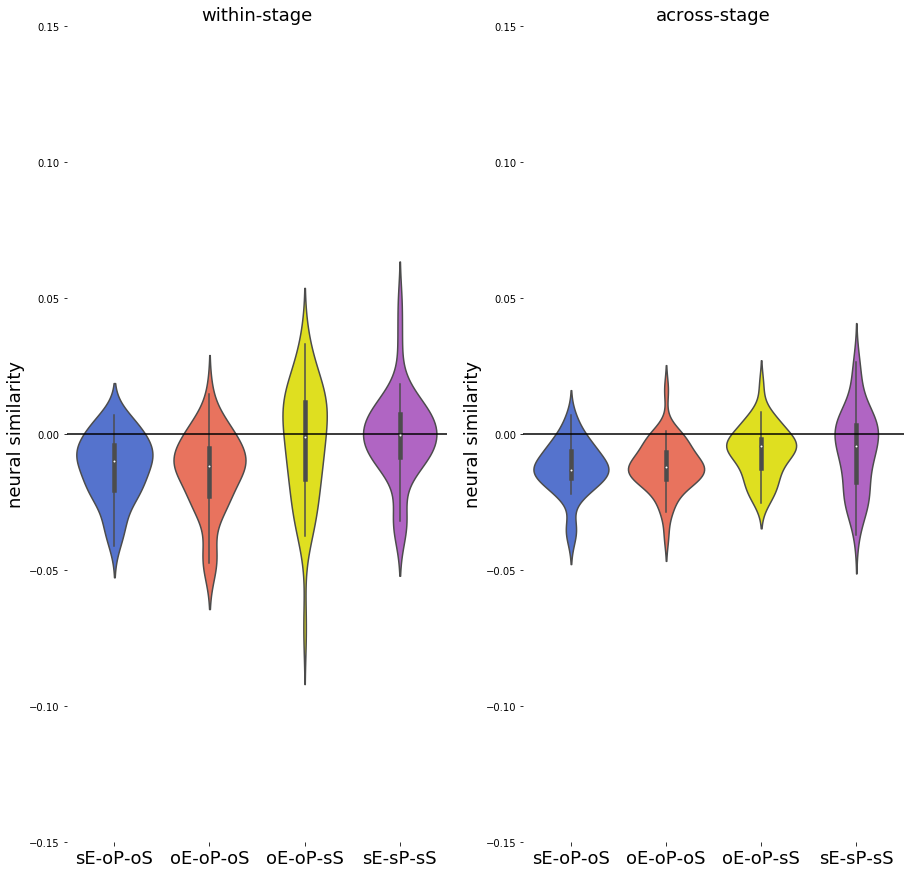

In [6]:
# average across the 3 within-stage
sameSameMeanAverage = (sameSameMean[0] + sameSameMean[4] + sameSameMean[8]) / 3
sameOtherMeanAverage = (sameOtherMean[0] + sameOtherMean[4] + sameOtherMean[8]) / 3
otherOtherMeanAverage = (otherOtherMean[0] + otherOtherMean[4] + otherOtherMean[8]) / 3
otherSameMeanAverage = (otherSameMean[0] + otherSameMean[4] + otherSameMean[8]) / 3

plt.figure(figsize=(15,15))

plt.subplot(1,2, 1)
plt.title("within-stage", fontsize=18)

set_of_Columns = [sameOtherMeanAverage, 
                      otherOtherMeanAverage,
                      otherSameMeanAverage,
                      sameSameMeanAverage]

set_of_Columns2 = pd.DataFrame(set_of_Columns)
set_of_Columns2 = set_of_Columns2.transpose()
seaborn.violinplot(data = set_of_Columns2, palette=["royalblue", "tomato", "yellow", "mediumorchid"])

plt.box(on=None)
plt.axhline(y=0, color='k')
plt.ylim([-0.15,0.15]) # plt.ylim([-0.15,0.15])      plt.ylim([-0.05,0.005])
plt.ylabel("neural similarity", fontsize=18)
plt.xticks([0,1,2,3], ["sE-oP-oS", 
                           "oE-oP-oS", 
                           "oE-oP-sS", 
                           "sE-sP-sS"], fontsize=18)

# average across the 6 across-stage    
sameSameMeanAverage2 = (sameSameMean[1] + sameSameMean[2] + sameSameMean[3] 
                           + sameSameMean[5]+ sameSameMean[6]+ sameSameMean[7]) / 6
sameOtherMeanAverage2 = (sameOtherMean[1] + sameOtherMean[2] + sameOtherMean[3] 
                            + sameSameMean[5]+ sameSameMean[6]+ sameSameMean[7]) / 6
otherOtherMeanAverage2 = (otherOtherMean[1] + otherOtherMean[2] + otherOtherMean[3] 
                             + sameSameMean[5]+ sameSameMean[6]+ sameSameMean[7]) / 6
otherSameMeanAverage2 = (otherSameMean[1] + otherSameMean[2] + otherSameMean[3] 
                            + sameSameMean[5]+ sameSameMean[6]+ sameSameMean[7]) / 6

plt.subplot(1,2, 2)

plt.title("across-stage", fontsize=18)

set_of_Columns3 = [sameOtherMeanAverage2, 
                      otherOtherMeanAverage2,
                      otherSameMeanAverage2,
                      sameSameMeanAverage2]

set_of_Columns4 = pd.DataFrame(set_of_Columns3)
set_of_Columns4 = set_of_Columns4.transpose()
seaborn.violinplot(data = set_of_Columns4, palette=["royalblue", "tomato", "yellow", "mediumorchid"])

plt.box(on=None)
plt.axhline(y=0, color='k')
plt.ylim([-0.15,0.15]) # plt.ylim([-0.15,0.15])      plt.ylim([-0.05,0.005])
plt.ylabel("neural similarity", fontsize=18)



plt.xticks([0,1,2,3], ["sE-oP-oS", 
                           "oE-oP-oS", 
                           "oE-oP-sS", 
                           "sE-sP-sS"], fontsize=18)



# save to .eps file
# plt.savefig(output_dir + ROI_name + '_cluster_'+ str(cluster_id) + '_violin_appendixFigure_grandAverage.eps')


In [ ]:
# save output to csv file for later t tests (performed in JASP)
set_of_Columns2 = set_of_Columns2.rename(columns={0: 'sameOther', 1: 'otherOther', 2: 'otherSame', 3: 'sameSame'})
# set_of_Columns2.to_csv(output_dir + ROI_name[0:8] + 'cluster' + str(cluster_id) + '_grandAverage_withinStage.csv')
    
set_of_Columns4 = set_of_Columns4.rename(columns={0: 'sameOther', 1: 'otherOther', 2: 'otherSame', 3: 'sameSame'})
# set_of_Columns4.to_csv(output_dir + ROI_name[0:8] + 'cluster' + str(cluster_id) + '_grandAverage_acrossStage.csv')
